In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures 
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet 

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor, VotingRegressor, ExtraTreesRegressor 
# Support vector regressor
from sklearn.svm import SVR 
from xgboost.sklearn import XGBRegressor

from sklearn import metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.utils import resample

from scipy import stats
from scipy.stats import zscore

In [2]:
import warnings 
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', None) 

In [3]:
train = pd.read_csv('./data/train.csv', encoding="ISO-8859-1")
test = pd.read_csv('./data/test.csv', encoding="ISO-8859-1")

In [4]:
train.head() 

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [5]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [6]:
train.shape

(32769, 10)

In [7]:
test.shape

(58921, 10)

In [8]:
train.nunique() 

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [9]:
train['ACTION'].unique()

array([1, 0], dtype=int64)

In [10]:
train['MGR_ID'].value_counts()

770      152
2270      99
2594      82
1350      71
2014      67
        ... 
1940       1
8087       1
22526      1
34948      1
58677      1
Name: MGR_ID, Length: 4243, dtype: int64

In [11]:
df = train.copy()

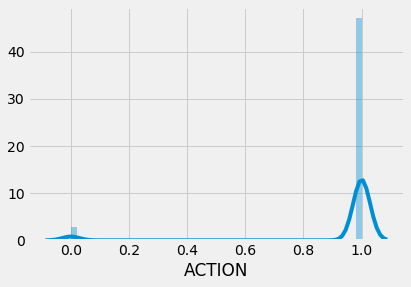

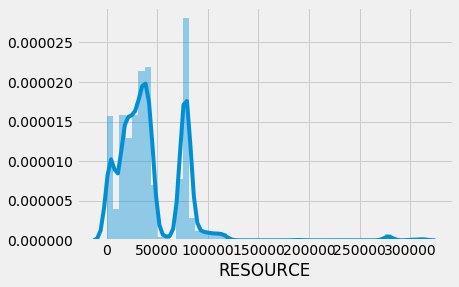

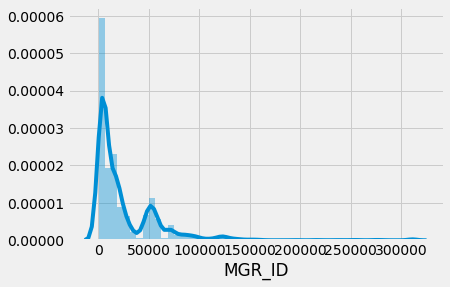

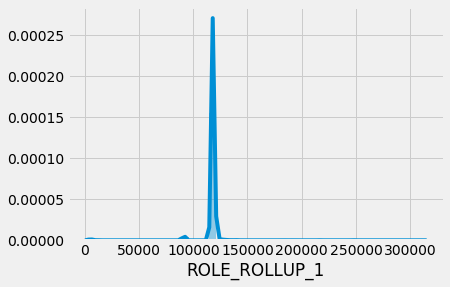

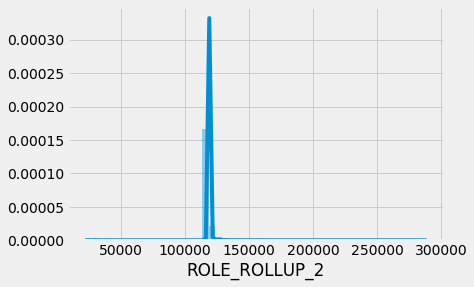

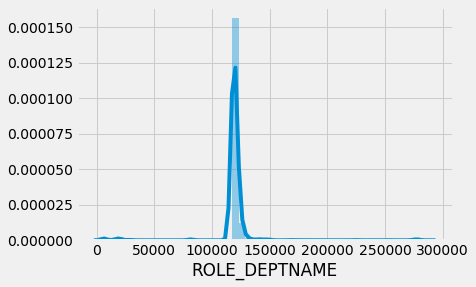

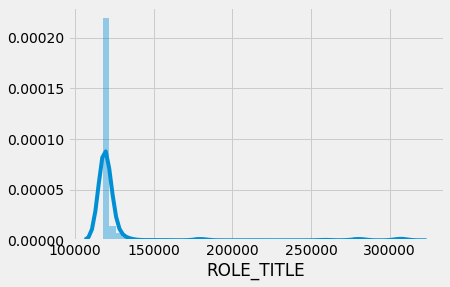

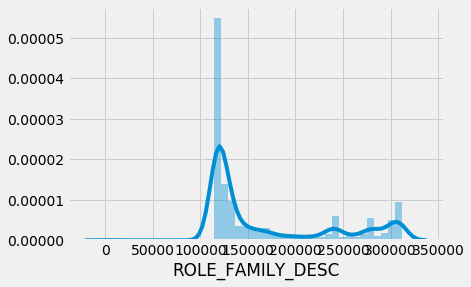

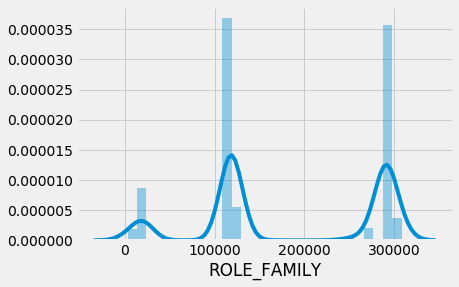

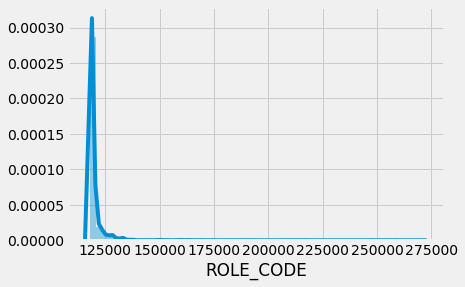

In [12]:
for col in df.columns:
    sns.distplot(df[col].dropna())
    plt.show()

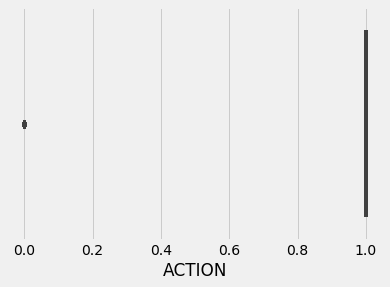

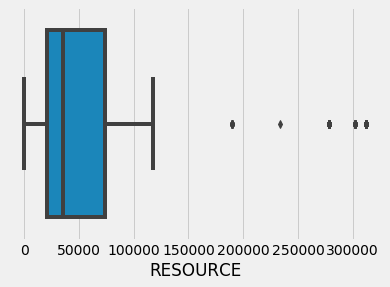

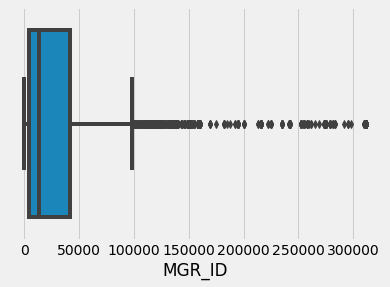

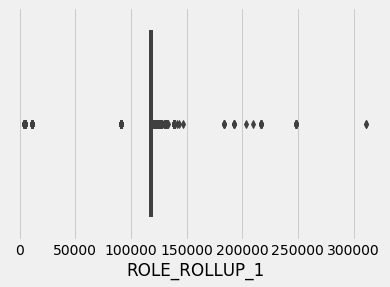

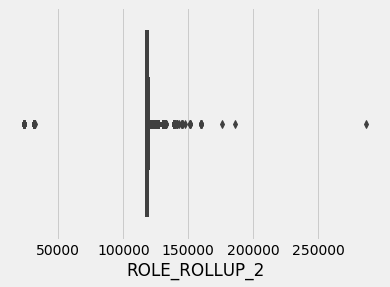

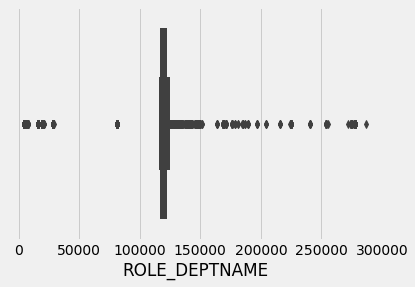

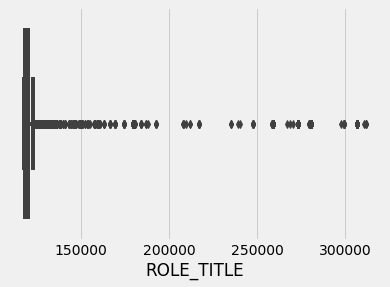

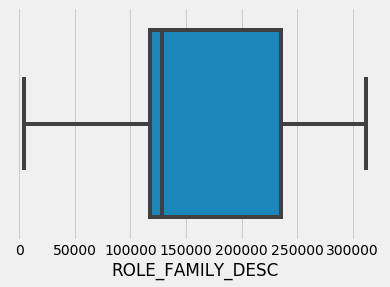

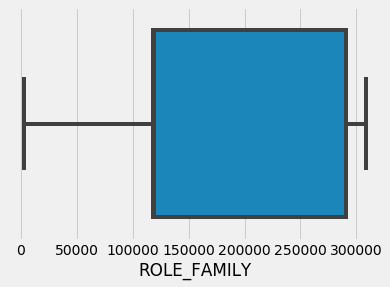

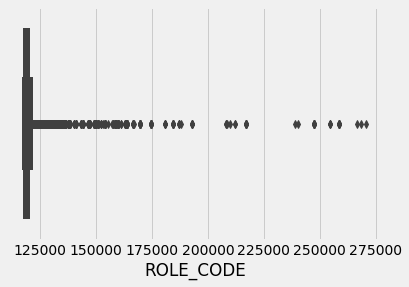

In [13]:
for col in df.columns:
    sns.boxplot(df[col].dropna())
    plt.show()

<Figure size 1152x1152 with 0 Axes>

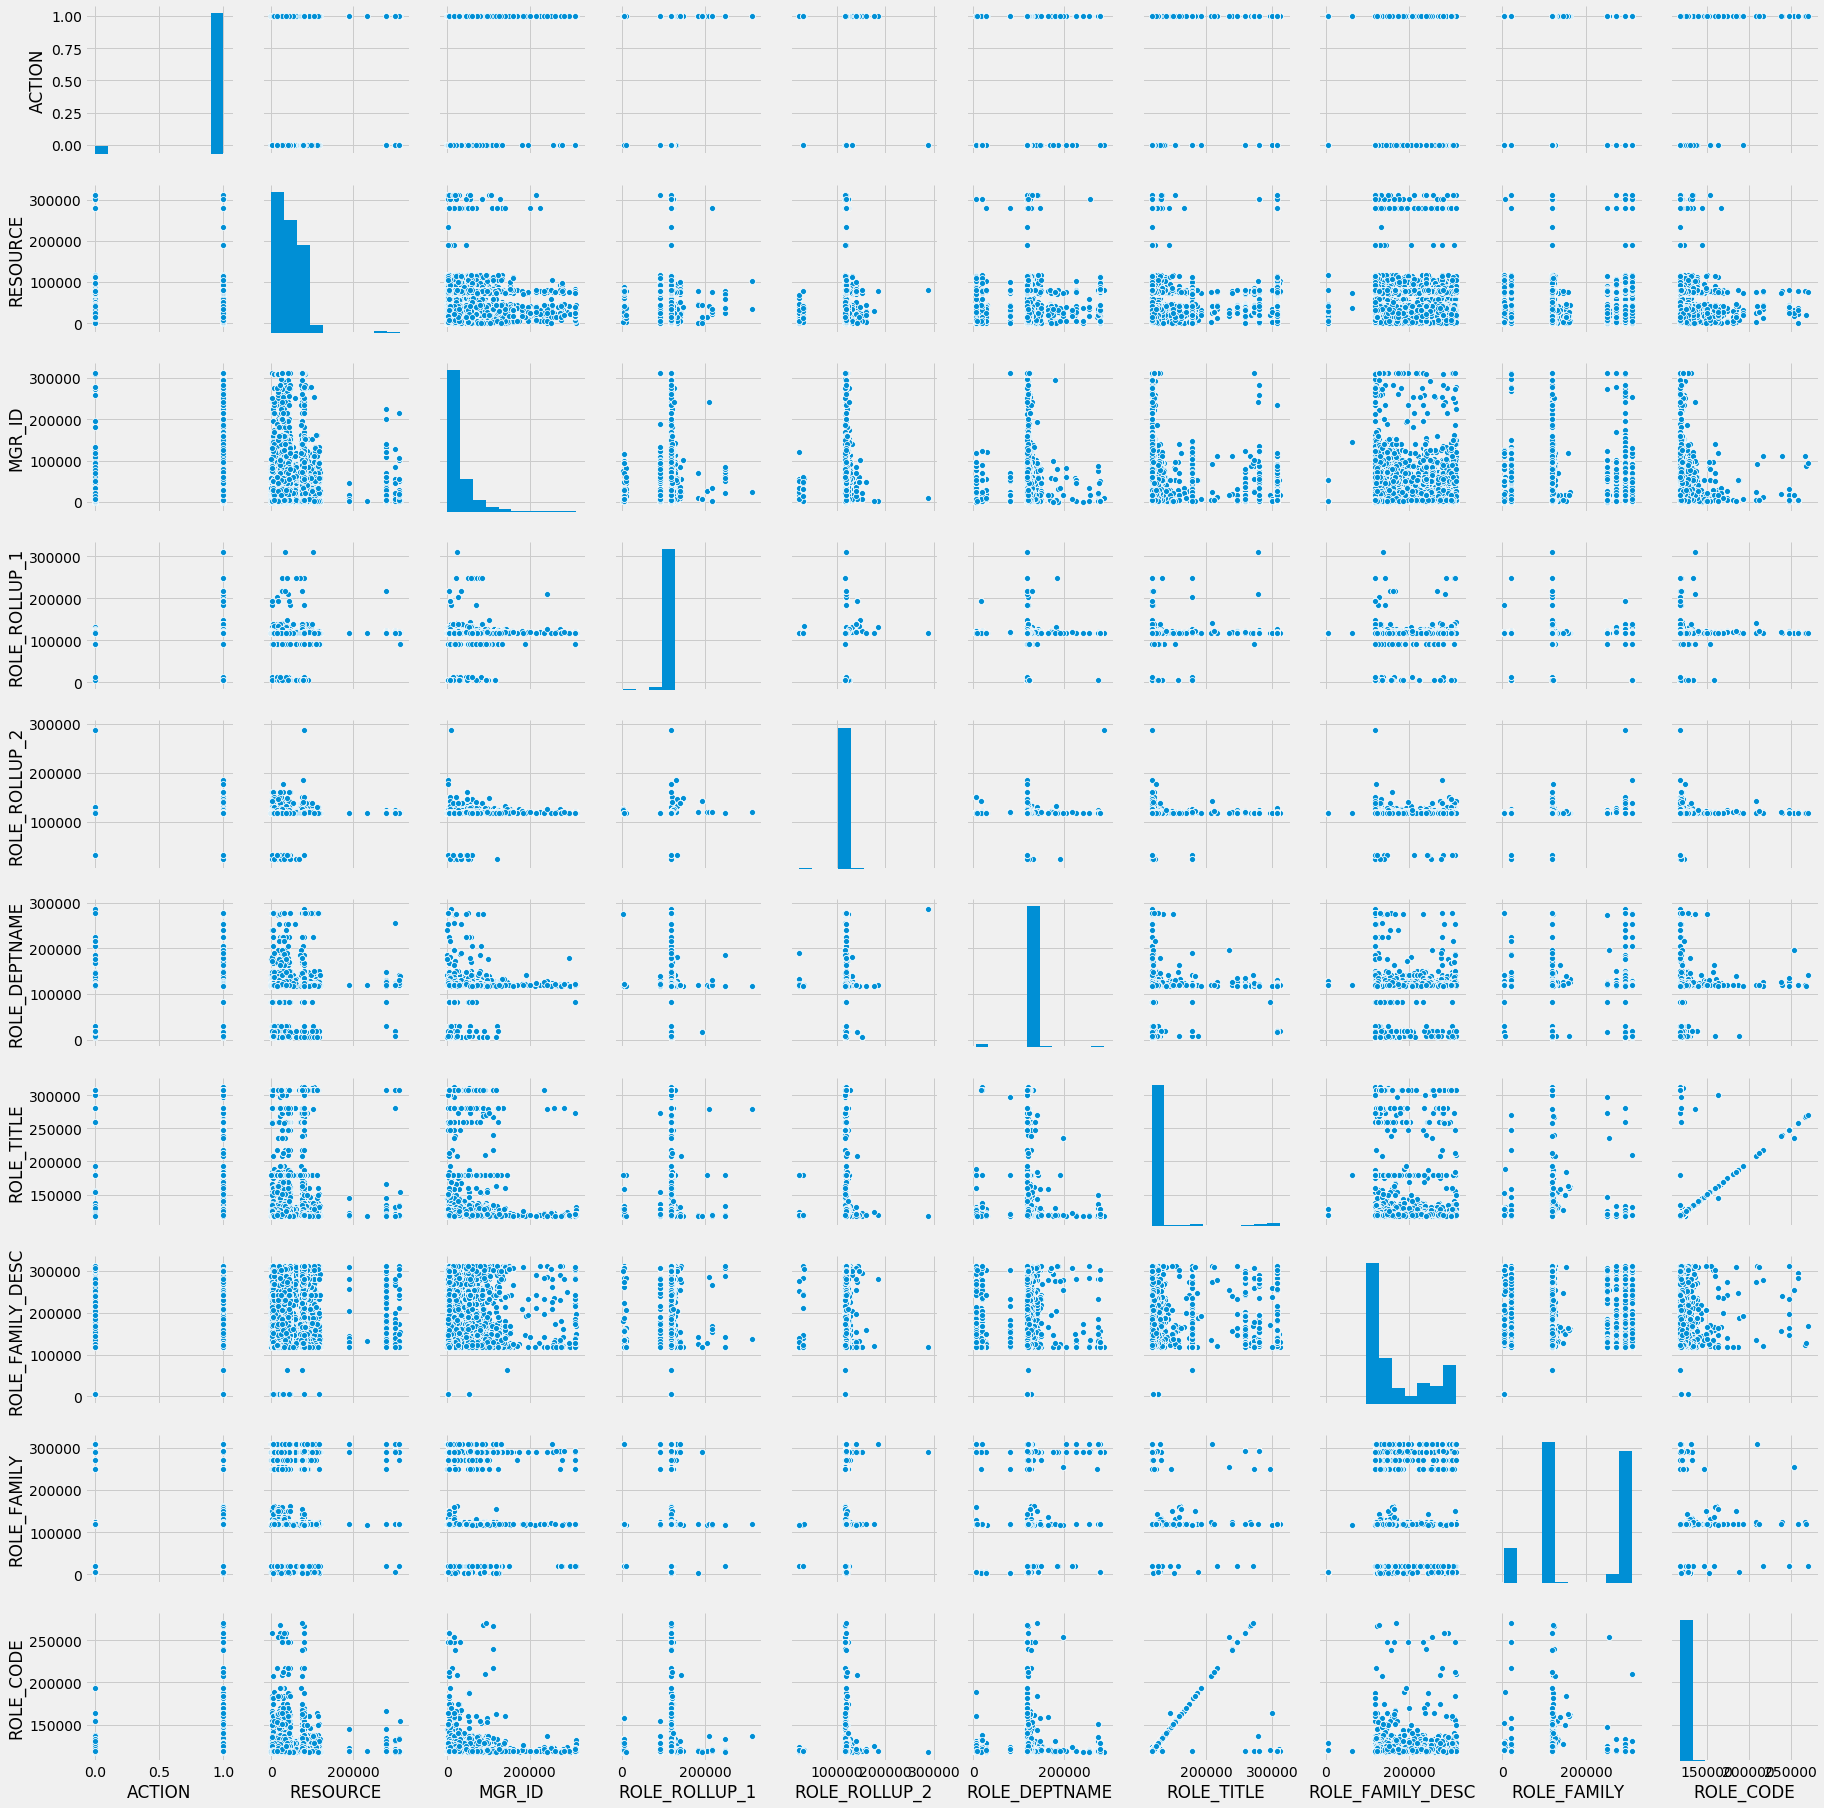

In [14]:
plt.figure(figsize=(16,16))
sns.pairplot(df)

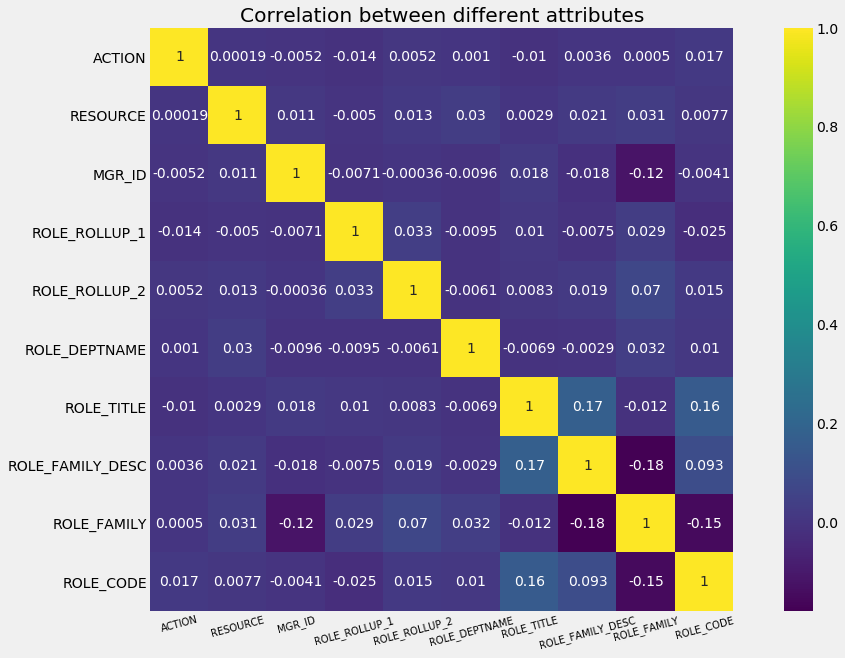

In [15]:
plt.figure(figsize=(16,10))
plt.rc('xtick', labelsize=10)   
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.xticks(rotation=15)
plt.show()

In [17]:
df.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [18]:
X = df.drop(['ACTION'], axis=1)

In [20]:
y = df['ACTION']

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=7)

In [24]:
from catboost import CatBoostClassifier

In [26]:
param = {'loss_function':'Logloss', 
        'eval_metric':'AUC',
        'verbose':200,
        'random_seed': 7}
catBstM_1 = CatBoostClassifier(**param)
catBstM_1.fit(X_train, y_train,
             eval_set=(X_valid, y_valid),
             use_best_model=True);

Learning rate set to 0.069882
0:	test: 0.5434852	best: 0.5434852 (0)	total: 296ms	remaining: 4m 55s
200:	test: 0.7958366	best: 0.7958366 (200)	total: 4.46s	remaining: 17.7s
400:	test: 0.8123362	best: 0.8123906 (398)	total: 7.86s	remaining: 11.7s
600:	test: 0.8249116	best: 0.8249116 (600)	total: 11.6s	remaining: 7.71s
800:	test: 0.8327125	best: 0.8327931 (790)	total: 15s	remaining: 3.72s
999:	test: 0.8376863	best: 0.8377124 (998)	total: 18.4s	remaining: 0us

bestTest = 0.8377124173
bestIteration = 998

Shrink model to first 999 iterations.


In [27]:
# catmodel_1.plot_tree(tree_idx=0)

# https://catboost.ai/docs/concepts/python-reference_catboostclassifier_plot_tree.html

SyntaxError: invalid syntax (<ipython-input-27-0e857ddda79c>, line 3)

In [28]:
X.shape[1]

9